## Clustering of the CAR Data Set 

## Importing Libraries

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [230]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

In [379]:
car_ori = pd.read_csv('cleanTrain.csv', index_col='Unnamed: 0')
car_df = car_ori.drop(['New_Price', 'Fuel'], axis=1)
car_df.sample(8)

,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
623,5,2009,90764.0,0,1,14.00,2498.0,112.00,8.0,3.85,17,0,1,0,0,0
2198,0,2013,96000.0,0,2,23.50,1498.0,90.00,5.0,3.50,8,0,1,0,0,0
727,2,2010,67714.0,0,1,18.50,1197.0,80.00,5.0,3.25,10,0,0,0,0,1
2606,8,2015,62144.0,0,2,26.21,1248.0,88.50,5.0,5.75,18,0,1,0,0,0
5180,1,2009,75000.0,1,2,13.70,1798.0,157.75,5.0,4.95,25,0,0,0,0,1
3815,2,2014,48000.0,0,1,18.00,1198.0,86.70,5.0,4.75,9,0,0,0,0,1
1043,7,2015,43190.0,0,1,19.01,1461.0,108.50,5.0,7.61,22,0,1,0,0,0
506,10,2010,137000.0,1,1,13.50,2987.0,282.00,5.0,18.50,19,0,1,0,0,0


## Normalizing Data

In [380]:
scaler = StandardScaler()
dt= scaler.fit_transform(car_df)
scaled_dt = pd.DataFrame(data= dt, columns= car_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   float64
 1   Year               6019 non-null   float64
 2   Kilometers_Driven  6019 non-null   float64
 3   Transmission       6019 non-null   float64
 4   Owner_Type         6019 non-null   float64
 5   Mileage            6019 non-null   float64
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Price              6019 non-null   float64
 10  Company            6019 non-null   float64
 11  Fuel_CNG           6019 non-null   float64
 12  Fuel_Diesel        6019 non-null   float64
 13  Fuel_Electric      6019 non-null   float64
 14  Fuel_LPG           6019 non-null   float64
 15  Fuel_Petrol        6019 non-null   float64
dtypes: float64(16)
memory us

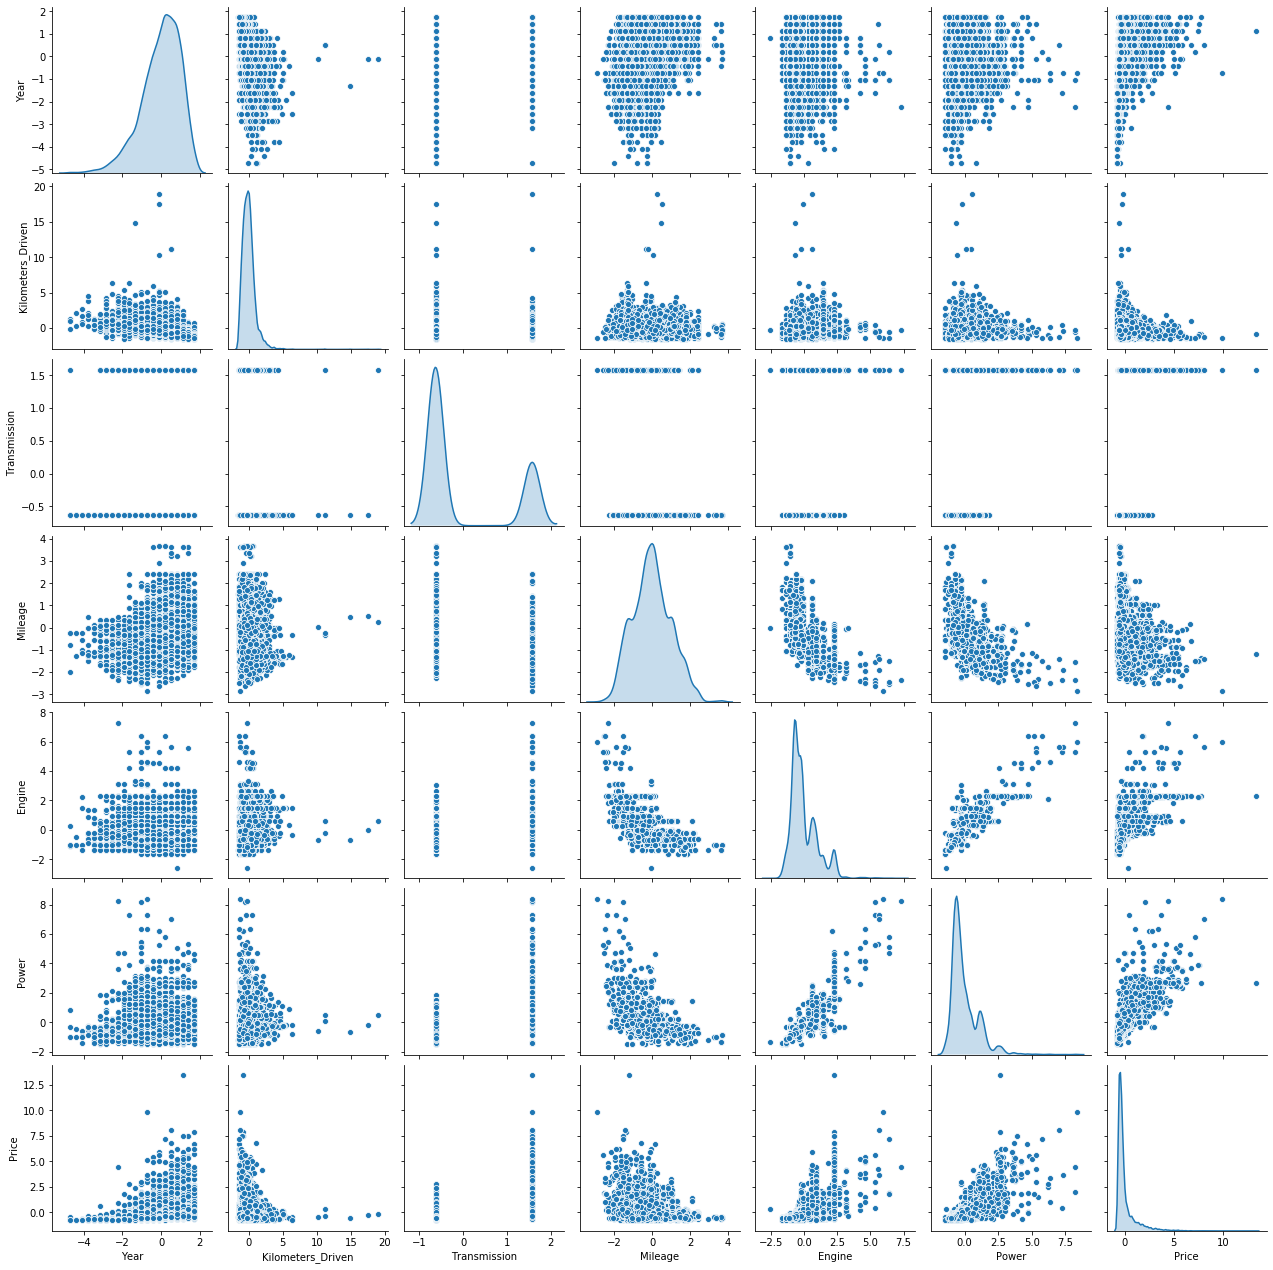

In [246]:
sns.pairplot(scaled_dt.drop(['Location', 'Company','Owner_Type','Seats','Fuel_CNG',
       'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG', 'Fuel_Petrol'], axis=1), diag_kind = 'kde')

> Remove the Existing natural clusters formed by the categorical variable, inoreder to find the hidden clusters.

In [540]:
cluster_df = scaled_dt.drop(['Company', 'Location', 'Price', 'Kilometers_Driven', 'Owner_Type', 'Year',
                            'Fuel_CNG', 'Fuel_Electric', 'Fuel_LPG'], axis=1)

In [541]:
cluster_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transmission,6019.0,3.027244e-16,1.000083,-0.632529,-0.632529,-0.632529,1.580955,1.580955
Mileage,6019.0,-1.464557e-16,1.000083,-2.876696,-0.708441,-0.033873,0.664787,3.661798
Engine,6019.0,1.014492e-17,1.000083,-2.582632,-0.704669,-0.212662,0.581219,7.300860
Power,6019.0,2.951249e-18,1.000083,-1.476813,-0.654730,-0.284980,0.471975,8.391940
Seats,6019.0,-1.348463e-15,1.000083,-4.079623,-0.345552,-0.345552,-0.345552,5.877900
Fuel_Diesel,6019.0,-5.766187e-16,1.000083,-1.067215,-1.067215,0.937018,0.937018,0.937018
Fuel_Petrol,6019.0,1.987482e-16,1.000083,-0.915962,-0.915962,-0.915962,1.091749,1.091749


## SIngle Linkage

In [542]:
ag_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
ag_cl.fit(cluster_df)
cluster_df['Groups'] = ag_cl.labels_
cluster_df.groupby('Groups').count()

,Transmission,Mileage,Engine,Power,Seats,Fuel_Diesel,Fuel_Petrol
Groups,,,,,,,
0,6016,6016,6016,6016,6016,6016,6016
1,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1


## Complete Linkage

In [543]:
ag_cl = AgglomerativeClustering(n_clusters=3
                                , affinity='euclidean', linkage='complete')
ag_cl.fit(cluster_df)
cluster_df['Groups'] = ag_cl.labels_
cluster_df.groupby('Groups').count()

,Transmission,Mileage,Engine,Power,Seats,Fuel_Diesel,Fuel_Petrol
Groups,,,,,,,
0,4940,4940,4940,4940,4940,4940,4940
1,1069,1069,1069,1069,1069,1069,1069
2,10,10,10,10,10,10,10


In [544]:
link = linkage(cluster_df, method='single')
c, coph_distance = cophenet(link, pdist(cluster_df))
print(c)

0.7472225519069842


## Average Linkage

In [545]:
ag_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
ag_cl.fit(cluster_df)
cluster_df['Groups'] = ag_cl.labels_
cluster_df.groupby('Groups').count()

,Transmission,Mileage,Engine,Power,Seats,Fuel_Diesel,Fuel_Petrol
Groups,,,,,,,
0,59,59,59,59,59,59,59
1,5955,5955,5955,5955,5955,5955,5955
2,5,5,5,5,5,5,5


In [546]:
link = linkage(cluster_df, method='single')
c, coph_distance = cophenet(link, pdist(cluster_df))
print(c)

0.7454997190765927


## Ward Linkage

In [547]:
ag_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_cl.fit(cluster_df)
cluster_df['Groups'] = ag_cl.labels_
car_df['Groups3'] = ag_cl.labels_
print(cluster_df['Groups'].value_counts())
link = linkage(cluster_df, method='ward')
c, coph_distance = cophenet(link, pdist(cluster_df))
print(c)

1    2699
0    1778
2    1542
Name: Groups, dtype: int64
0.7889929851618181


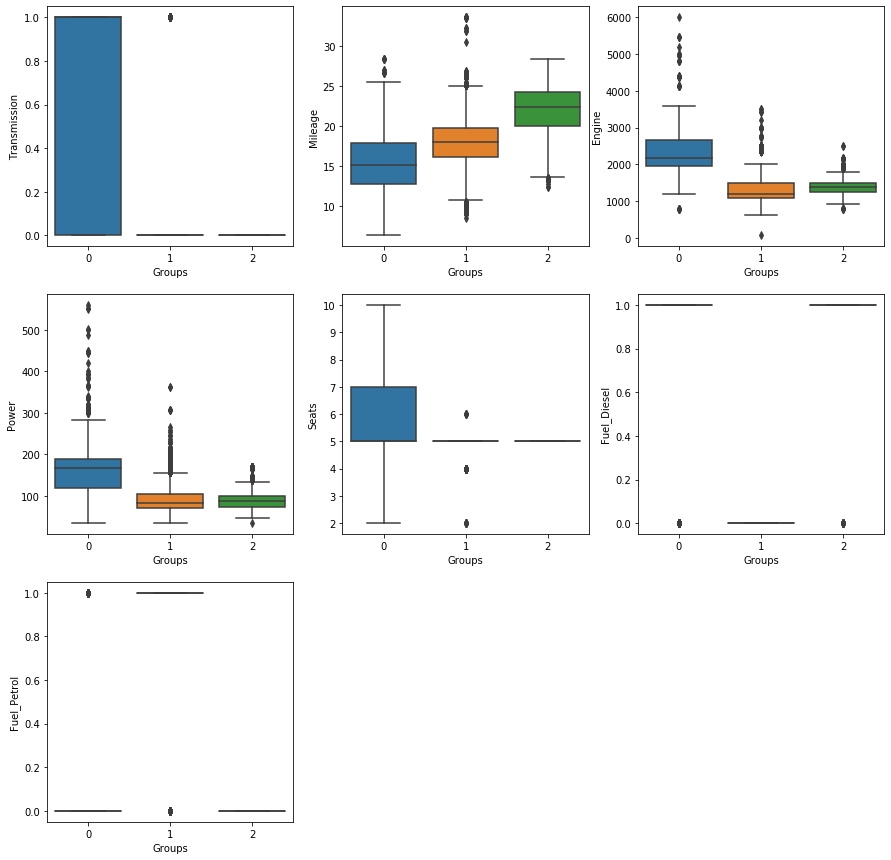

In [548]:
i=1
plt.figure(figsize=(15,15))
for c in cluster_df.drop(['Groups'], axis=1).columns:
    plt.subplot(3,3,i)
    sns.boxplot(x= cluster_df.Groups, y = car_df[c])
    i=i+1

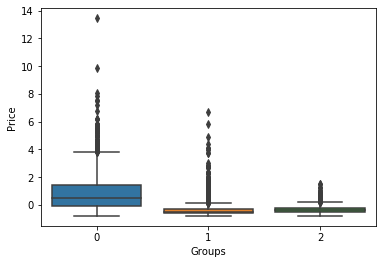

In [549]:
# Effect of clusters on Target Variable
sns.boxplot(x=cluster_df.Groups, y= scaled_dt.Price)

In [550]:
ag_cl = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ag_cl.fit(cluster_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [551]:
cluster_df['Groups'] = ag_cl.labels_
car_df['Groups5'] = ag_cl.labels_
cluster_df.groupby('Groups').count()

,Transmission,Mileage,Engine,Power,Seats,Fuel_Diesel,Fuel_Petrol
Groups,,,,,,,
0,1143,1143,1143,1143,1143,1143,1143
1,2126,2126,2126,2126,2126,2126,2126
2,1542,1542,1542,1542,1542,1542,1542
3,635,635,635,635,635,635,635
4,573,573,573,573,573,573,573


In [552]:
link = linkage(cluster_df, method='ward')
c, coph_distance = cophenet(link, pdist(cluster_df))
print(c)

0.7906412080971413


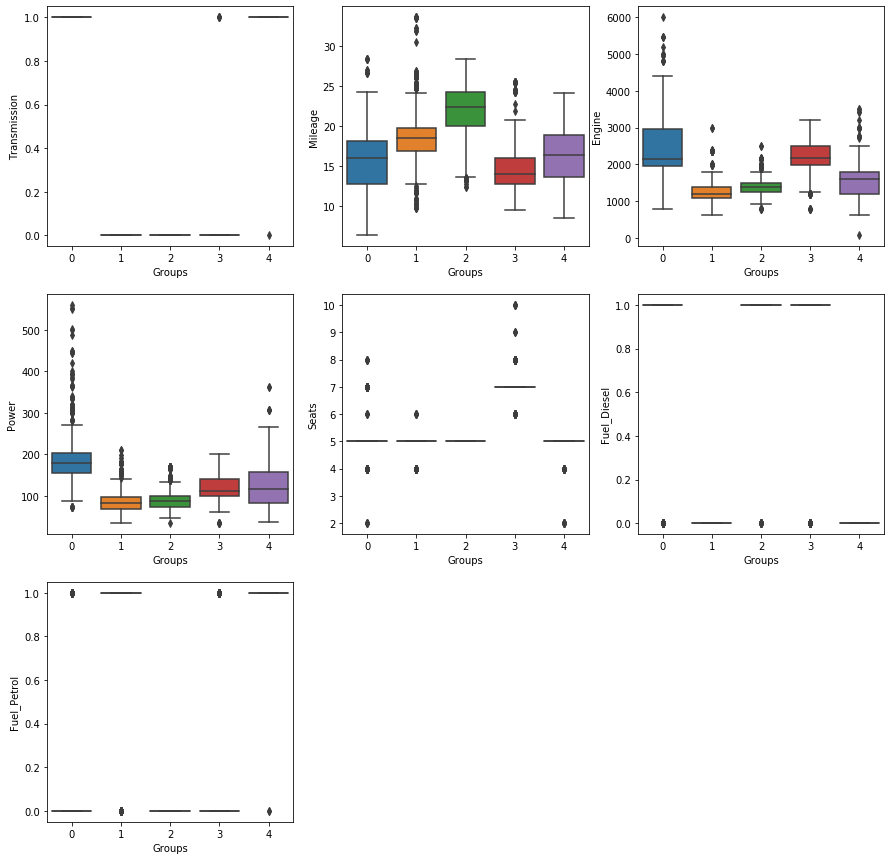

In [553]:
i=1
plt.figure(figsize=(15,15))
for c in cluster_df.drop(['Groups'], axis=1).columns:
    plt.subplot(3,3,i)
    sns.boxplot(x= cluster_df.Groups, y = car_df[c])
    i=i+1

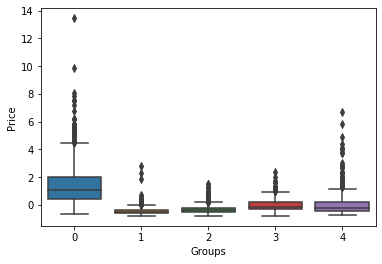

In [554]:
# Effect of Clusters on target variable
sns.boxplot(x=cluster_df.Groups, y= scaled_dt.Price)

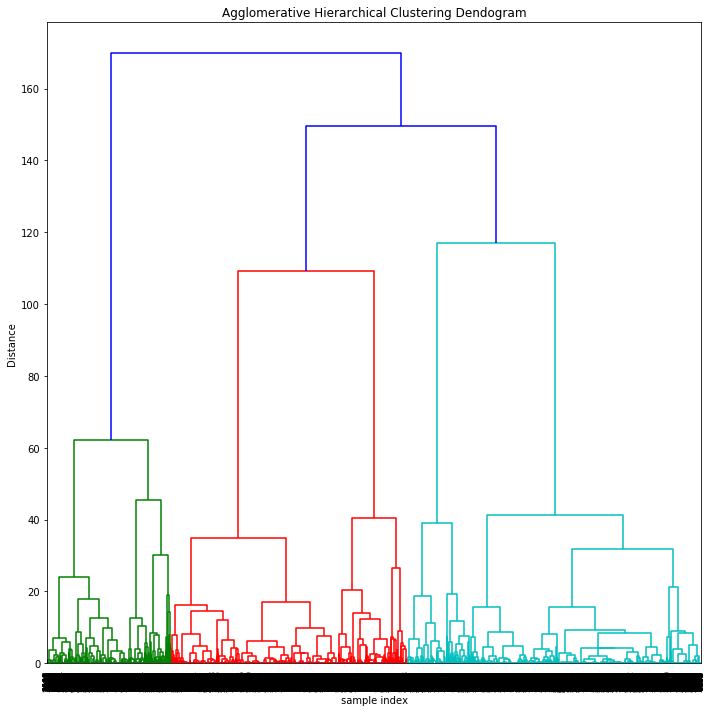

In [536]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation=90., color_threshold=125,leaf_font_size=8. )
plt.tight_layout()

In [555]:
car_ori['Group_3'] = car_df['Groups3']
car_ori['Group_5'] = car_df['Groups5']

In [556]:
car_ori.to_csv('car_groups.csv')


In [558]:
car_ori.sample(10)

,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Fuel,Group_3,Group_5
5476,10,2013,23627.0,1,1,14.80,1598.0,105.0,5.0,NaN,4.75,29,0,0,0,0,1,4,1,4
2898,5,2014,53000.0,1,1,16.55,1968.0,140.0,5.0,NaN,20.50,1,0,1,0,0,0,1,0,0
5303,8,2015,4311.0,0,1,25.83,1498.0,99.0,5.0,NaN,4.80,8,0,1,0,0,0,1,2,2
1043,7,2015,43190.0,0,1,19.01,1461.0,108.5,5.0,NaN,7.61,22,0,1,0,0,0,1,2,2
1443,5,2016,10000.0,0,1,24.07,998.0,67.1,5.0,4.53 Lakh,3.50,18,0,0,0,0,1,4,1,1
5216,2,2011,110000.0,1,1,16.96,1968.0,138.1,5.0,NaN,8.00,29,0,1,0,0,0,1,0,0
152,8,2010,35277.0,1,1,7.81,5461.0,362.9,5.0,NaN,30.00,19,0,0,0,0,1,4,0,0
512,7,2019,8587.0,0,1,15.29,1591.0,121.3,5.0,NaN,13.56,10,0,0,0,0,1,4,1,1
622,7,2011,54316.0,0,2,12.80,2354.0,177.6,5.0,NaN,4.29,9,0,0,0,0,1,4,1,1
4748,3,2019,16698.0,0,1,23.84,1199.0,84.0,5.0,6.21 Lakh,5.85,27,0,0,0,0,1,4,1,1
